In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from fcnn5_live_plotting_J import NN

In [2]:
ds = pd.read_csv('./bank-churn.csv')

In [3]:
num1 = ds[ds['Exited']==1].__len__()
num0 = num1

In [4]:
ds = pd.concat([ds[ds['Exited']==1][:num1], ds[ds['Exited']==0][:num0]], axis=0)

In [5]:
ds = ds.sample(frac=1)

In [6]:
x = ds[['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = ds['Exited']

In [7]:
m = len(x)
tr_cv = round(0.8 * m)  # border between train and dev datasets
cv_test = round(0.9 * m) # border between dev and test datasets

X_train, X_cv, X_test = x[:tr_cv], x[tr_cv:cv_test], x[cv_test:]
y_train, y_cv, y_test = y[:tr_cv], y[tr_cv:cv_test], y[cv_test:]

In [8]:
def z_standartization(df, columns):
  mean_dict = {}
  sd_dict = {}
  new_df = df.copy()
  for col in columns:
    c = new_df[col]
    mean = c.mean()
    sd = c.std()
    new_df[col] = (c - mean) / sd

    mean_dict[col] = mean
    sd_dict[col] = sd
  return new_df, mean_dict, sd_dict

In [9]:
def z_standartization_means_sd_from_dict(df, mean_dict, sd_dict):
  new_df = df.copy()
  for col, mean in mean_dict.items():
    sd = sd_dict[col]

    new_df[col] = (new_df[col] - mean) / sd
  
  return new_df


In [10]:
columns_to_scale = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [11]:
scaled_X_train, mean_X_train, sd_X_train = z_standartization(X_train, columns_to_scale)

scaled_X_cv = z_standartization_means_sd_from_dict(X_cv, mean_X_train, sd_X_train)
scaled_X_test = z_standartization_means_sd_from_dict(X_test, mean_X_train, sd_X_train)

In [12]:
scaled_X_train = np.array(scaled_X_train, dtype=np.float64).T
scaled_X_cv = np.array(scaled_X_cv, dtype=np.float64).T
scaled_X_test = np.array(scaled_X_test, dtype=np.float64).T

y_train, y_cv, y_test = np.array(y_train).reshape(1, -1), np.array(y_cv).reshape(1, -1), np.array(y_test).reshape(1, -1)

In [13]:
# plt.hist(y_train.T)

In [14]:
model_1 = NN([7, 10, 1])
J_history = []
J_cv_history = []

In [15]:
# model_1.load_json('./model_params.json')

In [15]:
%matplotlib qt


In [16]:
epochs = 1

In [17]:
model_1.backward(scaled_X_train, y_train, l_rate=0.03, epochs=epochs, minibatch_size=256, keep_prob=1, X_cv=scaled_X_cv, Y_cv=y_cv, live_plot_every=3)


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
*Epoch 1/1*
-------------------------------------------
[ep1/1] Minibatch 1/230
J: 0.70472370990247 => 0.70472370990247
MAE: [[0.48784141]] => [[0.48784141]]
Accuracy: 30625/59131 (51.79%) => 30625/59131 (51.79%)
J_cv: 0.7102374953109136 => 0.7102374953109136
MAE_cv: [[0.48794627]] => [[0.48794627]]
Accuracy_cv: 3847/7392 (52.04%) => 3847/7392 (52.04%)
-------------------------------------------
[ep1/1] Minibatch 2/230
J: 0.6967509301487047 => 0.6967509301487047
MAE: [[0.49733125]] => [[0.49733125]]
Accuracy: 29824/59131 (50.44%) => 29824/59131 (50.44%)
J_cv: 0.7063255235361915 => 0.7063255235361915
MAE_cv: [[0.50025884]] => [[0.50025884]]
Accuracy_cv: 3537/7392 (47.85%) => 3537/7392 (47.85%)
-------------------------------------------
[ep1/1] Minibatch 3/230
J: 0.6936575085083699 => 0.6936575085083699
MAE: [[0.49592319]] => [[0.49592319]]
Accuracy: 30031/59131 (50.79%) => 30031/59131 (50.79%)
J_cv: 0.6863409859846107 => 0.6863409859846107


##### J_h, J_cv_h = model_1.backward(scaled_X_train, y_train, l_rate=0.05, epochs=epochs, minibatch_size=64, keep_prob=1, X_cv=scaled_X_cv, Y_cv=y_cv, live_plot_every=1, prev_J_history=J_history, prev_J_cv_history=J_cv_history)
epochs = 1 => time = 5m 24.5s
##### J_h, J_cv_h = model_1.backward(scaled_X_train, y_train, l_rate=0.05, epochs=epochs, minibatch_size=64, keep_prob=1, X_cv=scaled_X_cv, Y_cv=y_cv, live_plot_every=10, prev_J_history=J_history, prev_J_cv_history=J_cv_history)
epochs = 1 => time = 3m 47.7s (30% faster if ploting only one time in 10 steps)
##### J_h, J_cv_h = model_1.backward(scaled_X_train, y_train, l_rate=0.05, epochs=epochs, minibatch_size=64, keep_prob=1, X_cv=scaled_X_cv, Y_cv=y_cv, live_plot_every=30, prev_J_history=J_history, prev_J_cv_history=J_cv_history)
epoch = 1 => time = 3m 43.9s

In [23]:
len(J_history), len(J_cv_history)

(6475, 6475)

In [17]:
model_1.J(np.array([[0.7, 0.4, 0.5]]), np.array([[1, 0, 1]]))

0.5202159160882228

In [22]:
plt.close()
%matplotlib inline

ValueError: x and y can be no greater than 2D, but have shapes (6475,) and (6475, 1, 1)

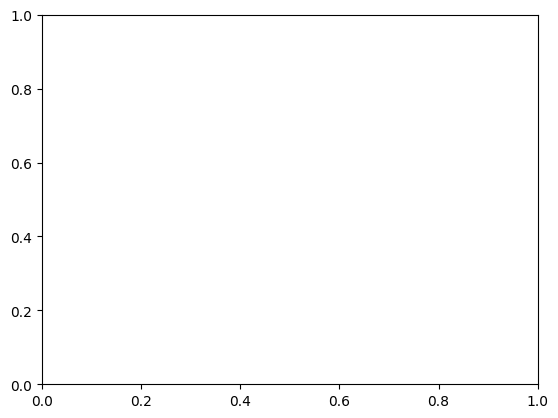

In [25]:
plt.plot(J_cv_history)

In [20]:
J_hist = [arr[0][0] for arr in J_history]
J_cv_hist = [arr[0][0] for arr in J_cv_history]
plt.plot(J_hist)
plt.plot(J_cv_hist)
plt.xlabel('# of iteration')
plt.ylabel('J value')

Text(470.06994949494947, 0.5, 'J value')

In [31]:
model_1.save_json('./fcnn5.json')